# Introduction

In this project, unsupervised learning techniques are applied to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that is used has been provided by Bertelsmann Arvato Analytics, and represents a real-life data science task.

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project:

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. This information will be used to cluster the general population into groups with similar demographic properties. Then, it will be seen how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, the demographics data for the general population will be loaded into a pandas DataFrame, and the same for the feature attributes summary. All of the `.csv` data files in this project are semicolon (`;`) delimited.

In [2]:
# Load in the general demographics data
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter= ';')

# Load in the feature summary file
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter= ';')

In [3]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
print("The general population dataframe has got {} rows and {} columns".format(azdias.shape[0],azdias.shape[1]))

The general population dataframe has got 891221 rows and 85 columns


In [5]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [6]:
feat_info.head(15)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [7]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.8+ KB


In [8]:
print("The features summary dataframe has got {} rows and {} columns".format(feat_info.shape[0],feat_info.shape[1]))

The features summary dataframe has got 85 rows and 4 columns


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The `feat_info` dataframe contains 85 rows representing the 85 columns in both the azdias and customers dataset. It provides valuable information on each column such as the level of information that the column provides (Personal, household etc.), the type of the column (categorical, ordinal, interval) and the values in the columns that represent missing or unknown entries.

This information will be very useful in cleaning and transforming the data in a format that is suitable for clustering.

#### Step 1.1.1: Convert Missing Value Codes to NaNs

The fourth column of the feature attributes summary documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. The string objects have to be parsed to make use of it to identify and clean the data. The data that matches a 'missing' or 'unknown' value code will be converted into a numpy NaN value.

In [9]:
#Prints missing_or_unknown value in the first row
mou_first = feat_info['missing_or_unknown'][0]

print(mou_first)

#Prints type
print(type(mou_first))

[-1,0]
<class 'str'>


The list is formatted as string. It can't be formatted into a list using list() as it will split every single character into its own value.

In [10]:
print(list(mou_first))

['[', '-', '1', ',', '0', ']']


The brackets from the string will have to be removed first, then the values will be split at every comma.

In [11]:
mou_to_list = mou_first.strip('][').split(',')

print(mou_to_list)
print(type(mou_to_list))

['-1', '0']
<class 'list'>


The values have been seperated as necessary. This method can be used by iterating over the parsed lists and replacing the values in the azdias dataset with NaNs

From exploring the `azdias.info()` printed earlier, it can be seen that all of the columns are either float or integer types with only four columns `[OST_WEST_KZ, CAMEO_DEUG_2015, CAMEO_DEU_2015 , CAMEO_INTL_2015]` being objects(strings). Let's see how they are represented in `feat_info`.

In [12]:
for attribute in ['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015' , 'CAMEO_INTL_2015']:
    print(attribute)
    print("missing or unknown values are presented as {}".format(feat_info['missing_or_unknown'][feat_info['attribute'] == attribute].values[0]))

OST_WEST_KZ
missing or unknown values are presented as [-1]
CAMEO_DEUG_2015
missing or unknown values are presented as [-1,X]
CAMEO_DEU_2015
missing or unknown values are presented as [XX]
CAMEO_INTL_2015
missing or unknown values are presented as [-1,XX]


Not all missing values are represented as numbers, some are presented as `X` and `XX`. When replacing values with NaNs, it will have to be taken into consideration the type of the column. For instance, if we try to replace the string `'-1'` with the value `-1` that exists in a numerical value, the replacement will fail as the type of the values are different. Thus, the numerical values that represent missing or unknown values will have to be changed to integers before replacing them in numerical columns.

In [13]:
replaced_azdias = azdias.copy()

# Iterate through all rows in feat_info
for index, row in feat_info.iterrows():
    string_to_list = row['missing_or_unknown'].strip('][').split(',')
    str_list = list(filter(None, string_to_list)) # removes empty strings
    column_name = row['attribute']

    if replaced_azdias[column_name].dtype != object: # If the columns are numerical
        
        int_list = list(map(int,str_list)) # Change value to an integer
        
        replaced_azdias[column_name].replace(int_list,np.NaN, inplace = True)
        
    else:
        replaced_azdias[column_name].replace(str_list,np.NaN, inplace = True)

#### Step 1.1.2: Assess Missing Data in Each Column

A comparison will be done on the dataset before and after replacing the missing or unknown values with NaNs to ensure that replacement was successful.

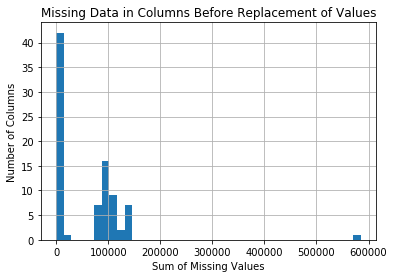

In [14]:
# Histogram of missing data before replacement of values
azdias.isnull().sum().hist(bins= 40)

plt.xlabel('Sum of Missing Values')
plt.ylabel('Number of Columns')
plt.title('Missing Data in Columns Before Replacement of Values')
plt.show()

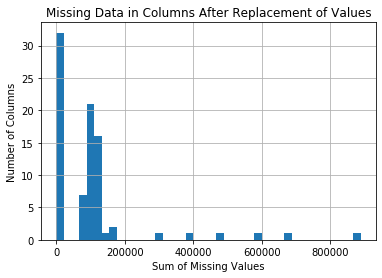

In [15]:
# Histogram of missing data after replacement of values
missing_value_cols = replaced_azdias.isnull().sum()

missing_value_cols.hist(bins= 40)

plt.xlabel('Sum of Missing Values')
plt.ylabel('Number of Columns')
plt.title('Missing Data in Columns After Replacement of Values')
plt.show()

Comparison of both histograms show that replacement of missing and unknown values with NaNs were successful.

The second histogram shows that most features have between 0-200,000 missing values, with six columns exceeding this value. Let's see which columns are they.

In [16]:
high_missing_values = missing_value_cols[missing_value_cols > 200000]

print(high_missing_values)

AGER_TYP        685843
GEBURTSJAHR     392318
TITEL_KZ        889061
ALTER_HH        310267
KK_KUNDENTYP    584612
KBA05_BAUMAX    476524
dtype: int64


In [17]:
# Remove columns containing high null values

high_null_columns = high_missing_values.index.tolist()

replaced_azdias = replaced_azdias.drop(high_null_columns, axis=1)

replaced_azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column



The histogram provided valuable information with regards to the dataset. It showed six columns containing more than 200,000 nul values. These columns were removed as they will negatively affect the quality and accuracy of the clusters to be formed later on if used.

The histogram also shows that some features contain the similar amount of missing values. This can be witnessed by observing the first bar with more than 30 features containing either a small amount of missing values or none at all. It can also be deduced by observing the densely packed group of bar charts that alot of the features do share the same number of missing values.

#### Step 1.1.3: Assess Missing Data in Each Row


As was done with the columns, we will also assess the missing data in each row and dropped the rows with high number of missing values.

In [18]:
missing_value_rows = replaced_azdias.isnull().sum(axis=1)

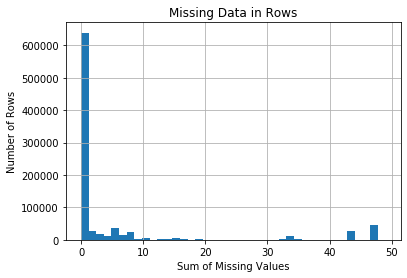

In [20]:
missing_value_rows.hist(bins= 40)
plt.xlabel('Sum of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Missing Data in Rows')
plt.show()

It can be witnessed from the bar chart that most rows contain between 0 and 10 missing values. Any row having more than 10 missing values will be dropped.

In [21]:
# Splits data into two subsets based on missing values in the rows
low_nan_rows = replaced_azdias[missing_value_rows <= 10]
high_nan_rows = replaced_azdias[missing_value_rows > 10]

In [22]:
print(low_nan_rows.shape)
print(high_nan_rows.shape)

(780153, 79)
(111068, 79)


In [23]:
replaced_azdias = low_nan_rows

In [ ]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets. -- to be done

#### Discussion 1.1.3: Assess Missing Data in Each Row

### Step 1.2: Select and Re-Encode Features

replace azdias with replaced_azdias

In [ ]:
feat_info.head()

In [ ]:
feat_info['type'].value_counts()

#### Step 1.2.1: Re-Encode Categorical Features

In [ ]:
# Get list of categorical columns
cat_cols = feat_info['attribute'][feat_info['type'] == 'categorical'].to_list()

print(cat_cols)

print(len(cat_cols))

In [ ]:
dropped_cols = high_missing_values.index.to_list()

In [ ]:
# Drop cat_cols that have been dropped previously

cat_cols = [col for col in cat_cols if col not in dropped_cols]

print(cat_cols)
len(cat_cols)

In [ ]:
azdias[cat_cols].nunique()

In [ ]:
binary_cols = azdias[cat_cols].nunique()[azdias[cat_cols].nunique() == 2].index.to_list()

In [ ]:
print(azdias[binary_cols].dtypes)

azdias[binary_cols].head()

# The ost_west_kz needs to be changed to numerical values

In [ ]:
azdias['OST_WEST_KZ'].value_counts()

In [ ]:
azdias['OST_WEST_KZ'].replace(['W','O'],[1,0], inplace=True)

azdias['OST_WEST_KZ'].value_counts()

In [ ]:
multi_cat_cols = azdias[cat_cols].nunique()[azdias[cat_cols].nunique() != 2].index.to_list()

In [ ]:
multi_cat_cols

In [ ]:
# One-hot encoding of categorical columns
encoded_azdias = pd.get_dummies(azdias, columns=multi_cat_cols)

In [ ]:
encoded_azdias.shape

#### Discussion 1.2.1: Re-Encode Categorical Features

///

#### Step 1.2.2: Engineer Mixed-Type Features

In [ ]:
encoded_azdias.dtypes.value_counts()

In [ ]:
# Looks like the only object column left is a mixed-type feature
encoded_azdias.dtypes[encoded_azdias.dtypes == 'object']

In [ ]:
feat_info[feat_info['type'] == 'mixed']

In [ ]:
encoded_azdias['PRAEGENDE_JUGENDJAHRE'].unique()

In [ ]:
decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 
         11:80, 12:80, 13:80, 14:90, 15:90} # Decade
movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 
         11:1, 12:0, 13:1, 14:0, 15:1} # Mainstream=0, Avantgarde=1

encoded_azdias['decade'] = encoded_azdias['PRAEGENDE_JUGENDJAHRE'].map(decade)
encoded_azdias['movement'] = encoded_azdias['PRAEGENDE_JUGENDJAHRE'].map(movement)

encoded_azdias.drop('PRAEGENDE_JUGENDJAHRE', inplace=True, axis=1)

encoded_azdias.shape

In [ ]:
encoded_azdias['CAMEO_INTL_2015'].unique()

In [ ]:
encoded_azdias['wealth'] = encoded_azdias['CAMEO_INTL_2015'].str[0].astype(dtype='float')

encoded_azdias['life_stage'] = encoded_azdias['CAMEO_INTL_2015'].str[0].astype(dtype='float')

encoded_azdias.drop('CAMEO_INTL_2015', inplace=True, axis=1)

In [ ]:
encoded_azdias.shape

In [ ]:
# One-hot encode rest of mixed columns

In [ ]:
mixed_cols = feat_info['attribute'][feat_info['type'] == 'mixed'].to_list()

In [ ]:
mixed_cols

In [ ]:
#Removes dropped cols and also cols dealt with previously
mixed_cols = [col for col in mixed_cols if col not in dropped_cols]

mixed_cols.remove('PRAEGENDE_JUGENDJAHRE')
mixed_cols.remove('CAMEO_INTL_2015')
                   
mixed_cols

In [ ]:
#one-hot encodes rest of columns
cleaned_azdias = pd.get_dummies(encoded_azdias, columns=mixed_cols)

cleaned_azdias.shape

#### Discussion 1.2.2: Engineer Mixed-Type Features

#### Step 1.2.3: Complete Feature Selection

In [ ]:
cleaned_azdias.dtypes.value_counts()

In [ ]:
# All features have been dealt with and converted to ints or floats

### Step 1.3: Create a Cleaning Function

In [ ]:
def clean_data(df):
    
    # First step fills values with NaNs
    for index, row in feat_info.iterrows():
        string_to_list = row['missing_or_unknown'].strip('][').split(',')
        str_list = list(filter(None, string_to_list)) # removes empty strings
        column_name = row['attribute']

        
        if df[column_name].dtype != object: # If the columns are not numerical
        
            int_list = list(map(int,str_list))
        
            df[column_name] = df[column_name].replace(int_list,np.NaN)
        
        else:
            df[column_name] = df[column_name].replace(str_list,np.NaN)
        
    # Second step removes same the columns that previously had alot of missing values
    
    df = df.drop(high_null_columns, axis=1)
        
    # Third step - remove selected rows
    
    df = df[df.isnull().sum(axis=1) <= 10]
    
    # Fourth step - re-encode, and engineer column values
    
    df['OST_WEST_KZ'] = df['OST_WEST_KZ'].replace(['W','O'],[1,0])
    
    df = pd.get_dummies(df, columns=multi_cat_cols)
        
    df['decade'] = df['PRAEGENDE_JUGENDJAHRE'].map(decade)
    df['movement'] = df['PRAEGENDE_JUGENDJAHRE'].map(movement)
    df = df.drop('PRAEGENDE_JUGENDJAHRE', axis=1)
    
    df['wealth'] = df['CAMEO_INTL_2015'].str[0].astype(dtype='float')
    df['life_stage'] = df['CAMEO_INTL_2015'].str[0].astype(dtype='float')
    df = df.drop('CAMEO_INTL_2015', axis=1)
    
    df = pd.get_dummies(df, columns=mixed_cols)
    
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling


In [ ]:
cleaned_azdias.isnull().sum(axis=1).hist(bins= 40)
plt.show()

cleaned_azdias.shape

We can see that more than 3/4 of the rows in our dataset do not contain any missing values. The missing data in the other rows will be filled with the most common value in that column.

In [ ]:
from sklearn.impute import SimpleImputer

imp_frq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed_azdias = imp_frq.fit_transform(cleaned_azdias)

imputed_azdias = pd.DataFrame(imputed_azdias)

imputed_azdias.columns = cleaned_azdias.columns

imputed_azdias.isnull().sum(axis=1).hist(bins= 40)
plt.show()

imputed_azdias.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()

scaled_azdias = std_scl.fit_transform(imputed_azdias)

scaled_azdias = pd.DataFrame(scaled_azdias)

scaled_azdias.columns = imputed_azdias.columns

scaled_azdias.describe()

### Discussion 2.1: Apply Feature Scaling

I used simple imputer to fill out the missing rows instead of dropping them. i used the most frequent value as it was the most suitable thing to do for our data. Mean would not be applicable here as alot of the missing data is from categorical/interval columns. Thus, if we get a number with a decimal point it would not be representative of any category in the column.

--- see if using the mean makes sense


### Step 2.2: Perform Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(scaled_azdias)

In [ ]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
#     ax.bar(ind, vals)
    ax.plot(ind, cumvals)
#     for i in range(num_components):
#         ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [ ]:
scree_plot(pca)

In [ ]:
pca = PCA(125)
X_pca = pca.fit_transform(scaled_azdias)

sum(pca.explained_variance_ratio_)

### Discussion 2.2: Perform Dimensionality Reduction

After performing a variability analysis demonstrated by the graph, it showed that the sum of the variability explained by all 125 components after PCA was applied was about 85%. This shows that we can cut the number of features to be used in our cluster analysis by more than half without losing significant amount of data hence reducing the quality of our data/analysis.

### Step 2.3: Interpret Principal Components

In [ ]:
print(X_pca.shape)

In [ ]:
def print_component(pca, comp):
    if comp <= len(pca.components_):
        weight_df = pd.DataFrame({'weight': pca.components_[comp]}, index=scaled_azdias.columns)
        print("Most weighted features for component", comp)
        print(weight_df.sort_values(by=['weight']).head(5))
        print(weight_df.sort_values(by=['weight']).tail(5))
    else:
        print('That is not the right input, please read the docstring before continuing.')
        
#Plot the first component
print_component(pca, 0)
#pca is the pca model object

In [ ]:
print_component(pca,1)

In [ ]:
print_component(pca,2)

### Discussion 2.3: Interpret Principal Components

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

In [ ]:
#Might try for 20 later

from sklearn.cluster import KMeans

def get_kmeans_score(data, center):

    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,16))

for center in centers:
    scores.append(get_kmeans_score(X_pca, center))
    print(center)
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [ ]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans = KMeans(n_clusters=13)

    # Then fit the model to your data using the fit method
model = kmeans.fit(X_pca)

In [ ]:
population_predictions = model.predict(X_pca)    

### Discussion 3.1: Apply Clustering to General Population

### Step 3.2: Apply All Steps to the Customer Data

In [ ]:
customers = pd.read_csv('Udacity_Customers_Subset.csv', delimiter= ';')

In [ ]:
customers.shape

In [ ]:
customers_cleaned = clean_data(customers)

In [ ]:
customers_cleaned.shape

The number of columns is not the same as azdias. Lets see why

In [ ]:
columns_azdias = imputed_azdias.columns.tolist()
columns_customers = customers_cleaned.columns.tolist()

missing_cols = [col for col in columns_azdias if col not in columns_customers]

print(missing_cols)

The reason why the column numbers is not exactly the same is because when pd.dummies on multi_cat_cols is applied the same number of unique values in the columns are not exactly the same (one short)

In [ ]:
customers_cleaned['GEBAEUDETYP_5.0'] = 0

customers_cleaned.shape

Have order of columns same as that of azdias

In [ ]:
customers_cleaned = customers_cleaned[imputed_azdias.columns]

(You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.) - even for rows

In [ ]:
# I ran this before removing rows with more than 10 missing values in the cleaning function
customers_cleaned.isnull().sum(axis=1).hist(bins= 40)
plt.show()

# It does make sense to drop the rows with more than 10 missing values.
# Most rows with missing values contain almost 40 missing values,
# That is almost 50% of the entries(columns)

In [ ]:
# Filling missing rows

imputed_customers = imp_frq.transform(customers_cleaned)

imputed_customers = pd.DataFrame(imputed_customers)

imputed_customers.columns = customers_cleaned.columns

imputed_customers.isnull().sum(axis=1).hist(bins=40)

imputed_customers.shape

In [ ]:
# Scaled customer dataframe
scaled_customers = std_scl.transform(imputed_customers)

scaled_customers = pd.DataFrame(scaled_customers)

scaled_customers.columns = imputed_customers.columns

In [ ]:
# PCA

customers_pca = pca.transform(scaled_customers)

In [ ]:
# Clustering

customer_predictions = model.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

In [ ]:
cust_prds_df = pd.Series(customer_predictions)

cust_props = cust_prds_df.value_counts()/cust_prds_df.value_counts().sum()

cust_props = cust_props.sort_index()

cust_props

In [ ]:
cust_props.plot.bar()

In [ ]:
pop_prds_df = pd.Series(population_predictions)

pop_props = pop_prds_df.value_counts()/pop_prds_df.value_counts().sum()

pop_props = pop_props.sort_index()

pop_props

In [ ]:
pop_props.plot.bar()

In [ ]:
diff_props = cust_props - pop_props

diff_props.plot.bar()

In [ ]:
# Dont complete discussion until kmeans is ran for more clusters